In [1]:
!cp -r /kaggle/input/paddy-full/dataset/* .

In [2]:
# yaml config for Yolo dataset
text = """
path: /kaggle/working/op
train: /kaggle/working/op/train
val: /kaggle/working/op/validate

nc: 12
names: [
  "blast",
  "black_stem_borer",
  "bacterial_panicle_blight",
  "bacterial_leaf_streak",
  "bacterial_leaf_blight",
  "hispa",
  "tungro",
  "brown_spot",
  "leaf_roller",
  "downy_mildew",
  "yellow_stem_borer",
  "white_stem_borer"
]
"""
yaml_file = "/kaggle/working/op/data.yaml"

with open(yaml_file,"w") as f:
  # print(text)
  f.write(text)

In [3]:
#Install Yolo v8
!pip install -U ultralytics --q

In [4]:
!wandb disabled

W&B disabled.


In [5]:
# hyps = """task: detect
# mode: train
# imgsz: 640
# batch: 16
# patience: 0
# epochs: 300
# model: yolov8l.pt
# data: op/data.yaml
# lr0: 0.00362
# lrf: 0.00763
# momentum: 0.81129
# weight_decay: 0.00077
# warmup_epochs: 5.0
# warmup_momentum: 0.60398
# box: 3.72272
# cls: 0.52593
# dfl: 1.21818
# hsv_h: 0.00798
# hsv_s: 0.37265
# hsv_v: 0.52255
# degrees: 12.0
# translate: 0.0714
# scale: 0.38222
# shear: 0.
# perspective: 0.0
# flipud: 0.0
# fliplr: 0.15632
# mosaic: 1.0
# mixup: 0.0
# copy_paste: 0.0
# iou: 0.6
# conf: 0.2"""

# with open("best_hyps.yaml","w") as f:
#     f.write(hyps)

In [6]:
hyps = """task: detect
mode: train
imgsz: 640
batch: 16
patience: 100
epochs: 300
model: yolov8l.pt
data: op/data.yaml
"""

with open("best_hyps.yaml","w") as f:
    f.write(hyps)

In [7]:
! yolo cfg=best_hyps.yaml

Overriding /opt/conda/lib/python3.10/site-packages/ultralytics/cfg/default.yaml with best_hyps.yaml
100%|███████████████████████████████████████| 83.7M/83.7M [00:00<00:00, 247MB/s]
Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=op/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms

In [8]:
import os,random
import matplotlib.pyplot as plt

In [9]:
imgs = os.listdir("/kaggle/working/op/validate/images")

In [10]:
# !rm -r runs/detect/predict*

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43615860 parameters, 0 gradients, 164.9 GFLOPs

image 1/1 /kaggle/working/op/validate/images/62e10626e2bcfbae22a5d642cdab9c83.jpg: 640x480 1 bacterial_leaf_blight, 1 hispa, 59.4ms
Speed: 5.2ms preprocess, 59.4ms inference, 301.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


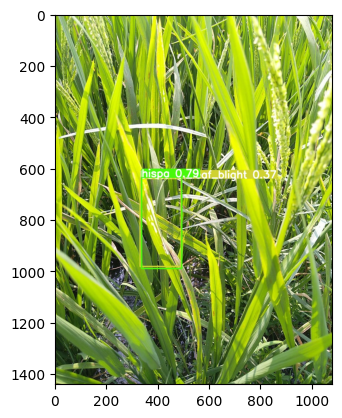

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43615860 parameters, 0 gradients, 164.9 GFLOPs

image 1/1 /kaggle/working/op/validate/images/12edcbfbc7b834de94be212fb3965f00.jpg: 640x480 1 leaf_roller, 59.8ms
Speed: 4.6ms preprocess, 59.8ms inference, 378.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


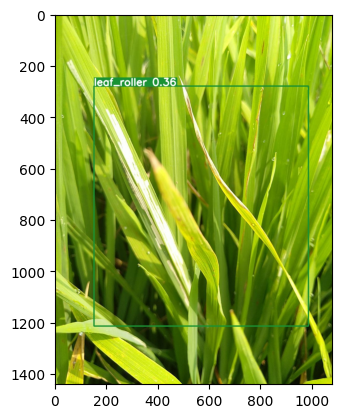

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43615860 parameters, 0 gradients, 164.9 GFLOPs

image 1/1 /kaggle/working/op/validate/images/7e01db85a4e02f39524af75b9635a58c.jpg: 640x480 1 yellow_stem_borer, 65.3ms
Speed: 5.8ms preprocess, 65.3ms inference, 328.3ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


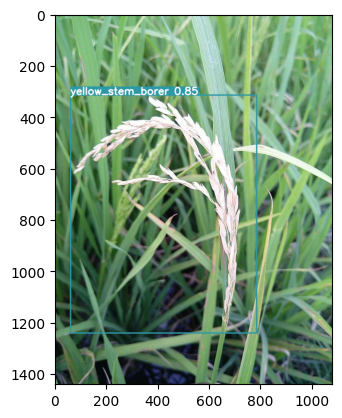

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43615860 parameters, 0 gradients, 164.9 GFLOPs

image 1/1 /kaggle/working/op/validate/images/b4c61a541e91e46be23df13ec0540ad7.jpg: 640x480 (no detections), 65.1ms
Speed: 5.3ms preprocess, 65.1ms inference, 14.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


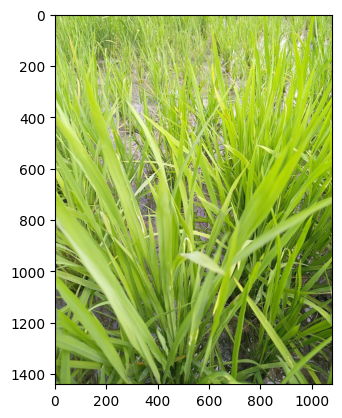

Ultralytics YOLOv8.1.14 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 43615860 parameters, 0 gradients, 164.9 GFLOPs

image 1/1 /kaggle/working/op/validate/images/dfcc049170df61059220d84648c1e1c0.jpg: 640x480 1 leaf_roller, 59.7ms
Speed: 5.9ms preprocess, 59.7ms inference, 317.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict5
💡 Learn more at https://docs.ultralytics.com/modes/predict


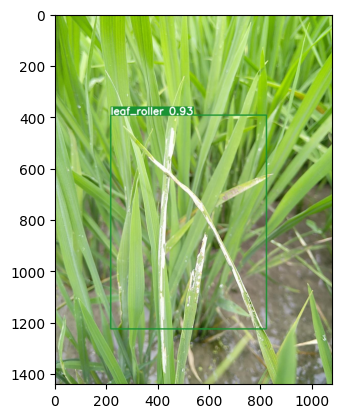

In [11]:
for i in range(5):
    ch = random.choice(imgs)

    !yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="/kaggle/working/op/validate/images/"$ch
    pred_path = os.listdir("./runs/detect")
    pred_path.sort()
    plt.imshow(plt.imread(f"./runs/detect/{pred_path[-2]}/{ch}"))
    plt.show()

In [12]:
!ls runs/detect/

predict  predict2  predict3  predict4  predict5  train


In [13]:
# pred_path = os.listdir("./runs/detect")
# pred_path.sort()

In [14]:
# pred_path[-2]

In [15]:
# from IPython.display import FileLink
# FileLink(r'runs/detect/train/weights/best.pt')